# What Makes an Airbnb House Expensive in New York?

In [120]:
# Import modules
import pandas as pd
from IPython.display import display 
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [121]:
# Read dataset
ny2019_airbnb_raw = pd.read_csv("AB_NYC_2019.csv")

In [122]:
# Display basic information about this dataset
ny2019_airbnb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Firstly, we convert the data type of last review from an object to datetime.

In [123]:
# Get a copy of the original dataset
ny2019_airbnb_raw_copy = ny2019_airbnb_raw.copy()

# Change the datatype of last review from object to datetime
ny2019_airbnb_raw_copy['last_review'] =  pd.to_datetime(ny2019_airbnb_raw_copy['last_review'])

In [124]:
# Display some data to get a sense about data
ny2019_airbnb_raw_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Based on the above displays of data, it would be appropriate to choose price as a response variable. Price is a continuous numerical random variable, and it might be interesting to airbnb users and house owners to get information about what makes a house more expensive for staying. The following factors may be related with housing price:
- Neighbourhood, as some neighbourhood may be more expensive in housing than others
- Location (latitude and longitude), yet these factors are difficult to fit and interpret in a regression model, so I would not choose them as explanatory variables in regression.
- Room type, as some room types (full house versus single room) may be more expensive due to their size differences.
- Minimum nights, as some houses requiring multiple nights at appointment may be more or less expensive.
- Date of last review, as houses having more recent reviews might be more popular, so more or less expensive.
- Reviews per month, as as houses having more reviews might be more popular, so more or less expensive.
- Number of listings, as houses with more listings might be more popular, so more orless expensive.
- Availability, as houses that are more available might be more prefered by users, so more expensive.

Looking at the above variables, we can already detect some possible correlation among explanatory variables. We will take a more detailed look at possible collinearity in later sections.

Moving on, we will take a more detailed look at the response and explanatory variables.

In [125]:
ny2019_airbnb_reg = ny2019_airbnb_raw_copy.drop(
    ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude'], axis = 1)

# Brief numerical summary of data
ny2019_airbnb_reg.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The above table contains the summary statistics of the variables of interest.

The first row displays the number of valid observations for each numerical variable, and we can realize that, except for the number of reviews per month, all variables have 48895 observations, which is a fairly large sample size. However, there are about 10,000 missing data in the number of reviews per month, so we may need to decide later on how to treat these missing data.

The second row is the average number for each variable. Taking the response variable price as an example, the average price of staying per night in houses registered at Airbnb in 2019 in New York was 152.72 US dollars. It was interesting to realize that, the average minimum number of nights required to stay is a week, and the average available days per year is 131.6 days. This indicates that not a lot of houses allow users to stay for one or two nights, and there are lots of houses that are not available throughout the year. 

The third row is the standard deviation, which is a measurement of how spread out is the variable. It was interesting to note that most variables, including price, number of minimum nights, number of host listings, and availability are quite spread out, meaning that there are minorities of extreme values in the dataset. This might post threat to validity of the regression model, which we will investigate later on.

The other rows display the minimum and maximum value for each variable, as well as their quantiles. These measurements again inform us about the spread of data, yet they can be more effectively communicated by using visualizations, which we will cover in the graphical data analysis part.

In [126]:
len(ny2019_airbnb_raw_copy['room_type'].unique())

3

In [142]:
ny2019_airbnb_by_room_type = ny2019_airbnb_raw_copy.copy().drop(
    ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude',
    'neighbourhood', 'neighbourhood_group', 'last_review'], axis = 1)
ny2019_airbnb_group_room = ny2019_airbnb_by_room_type.groupby('room_type').mean()
ny2019_airbnb_group_room_count = ny2019_airbnb_by_room_type.groupby('room_type')['price'].count().rename('count')
ny2019_airbnb_group_room_full = pd.merge(ny2019_airbnb_group_room, 
                                        ny2019_airbnb_group_room_count, on = 'room_type')
ny2019_airbnb_group_room_full = ny2019_airbnb_group_room_full.sort_values(by = 'price', ascending = True)
ny2019_airbnb_group_room_full

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,count
room_type,,,,,,,
Shared room,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862,1160
Private room,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933,22326
Entire home/apt,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304,25409


In [128]:
len(ny2019_airbnb_raw_copy['neighbourhood'].unique())

221

In [129]:
len(ny2019_airbnb_raw_copy['neighbourhood_group'].unique())

5

In [130]:
ny2019_airbnb_by_neighbourhood = ny2019_airbnb_raw_copy.copy().drop(
    ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude',
     'neighbourhood', 'room_type', 'last_review'], axis = 1)
ny2019_airbnb_group_neighbor = ny2019_airbnb_by_neighbourhood.groupby('neighbourhood_group').mean()
ny2019_airbnb_group_neighbor_count = \
    ny2019_airbnb_by_neighbourhood.groupby('neighbourhood_group')['price'].count().rename('count')

In [135]:
ny2019_airbnb_group_neighbor_full = pd.merge(ny2019_airbnb_group_neighbor, 
                                             ny2019_airbnb_group_neighbor_count, on = 'neighbourhood_group')
ny2019_airbnb_group_neighbor_full = \
    ny2019_airbnb_group_neighbor_full.sort_values(by='price',ascending=True)
ny2019_airbnb_group_neighbor_full

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,count
neighbourhood_group,,,,,,,
Bronx,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937,1091
Queens,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818,5666
Staten Island,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284,373
Brooklyn,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292,20104
Manhattan,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410,21661


Text(0.5, 1.0, 'Distribution of Price of Airbnb per Night in New York')

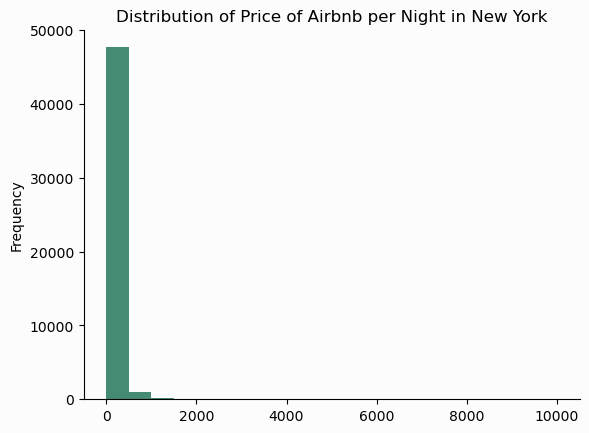

In [132]:
# Graphical Analysis
fig, ax = plt.subplots()
ny2019_airbnb_reg.plot(
    kind="hist", y="price", color='#458B74', bins = 20,
    legend=False, ax=ax
)
bgcolor = (0.99, 0.99, 0.99)
ax.set_facecolor(bgcolor)
fig.set_facecolor(bgcolor)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Distribution of Price of Airbnb per Night in New York")

Text(0.5, 1.0, 'Distribution of Price by Room Type in NYC')

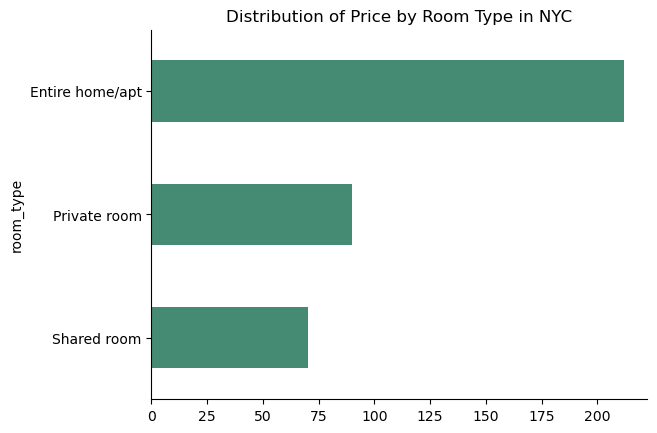

In [143]:
fig, ax = plt.subplots()
ny2019_airbnb_group_room_full["price"].plot(kind="barh", ax=ax, color='#458B74')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Distribution of Price by Room Type in NYC")

Text(0.5, 1.0, 'Distribution of Price by Neighbourhood in NYC')

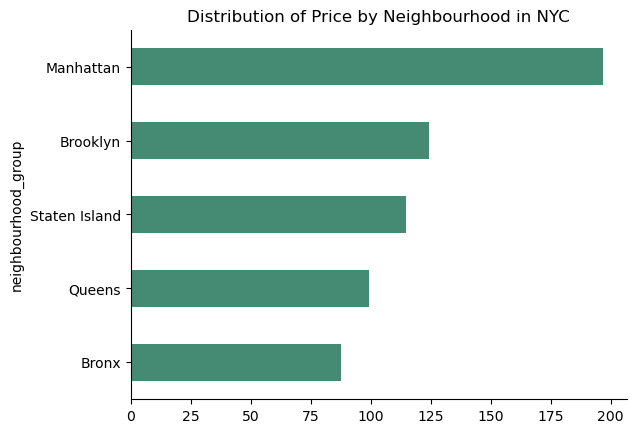

In [137]:
fig, ax = plt.subplots()
ny2019_airbnb_group_neighbor_full["price"].plot(kind="barh", ax=ax, color='#458B74')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Distribution of Price by Neighbourhood in NYC")